<a href="https://colab.research.google.com/github/andreamarin/senate-publications-analysis/blob/add%2Fnews-analysis/news_topic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
!git clone https://github.com/andreamarin/senate-publications-analysis.git

Cloning into 'senate-publications-analysis'...
remote: Enumerating objects: 196, done.
remote: Counting objects: 100% (151/151), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 196 (delta 74), reused 71 (delta 26), pack-reused 45 (from 1)
Receiving objects: 100% (196/196), 1.48 MiB | 5.78 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [2]:
%cd senate-publications-analysis/nlp_classification/

/content/senate-publications-analysis/nlp_classification


In [3]:
!git checkout add/news-analysis

Branch 'add/news-analysis' set up to track remote branch 'add/news-analysis' from 'origin'.
Switched to a new branch 'add/news-analysis'


In [4]:
%mkdir config

In [9]:
%cp ../../drive/MyDrive/tesis/code/config/* ./config/.

In [10]:
%ls config

bot-cert.pem


In [5]:
!git pull

Already up to date.


In [11]:
!pip install -r colab_requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.9/494.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.2/920.2 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 89.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully unin

In [ ]:
!pip install pymongo==4.3.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.9/494.9 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 20.8 MB/s eta 0:00:00


In [ ]:
!pip install pyLDAvis

In [ ]:
!pip install gensim

In [ ]:
!pip install spacy==3.7.5 thinc

In [1]:
!pip freeze | grep pymongo

pymongo==4.3.3


In [2]:
! python -m spacy download es_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 2.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
!curl ipecho.net/plain

34.80.62.2

In [4]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


# Imports

In [5]:
import sys
sys.path.append('/content/senate-publications-analysis/nlp_classification')

In [6]:
import os
import re
import nltk
import spacy
import importlib
# import pyLDAvis.gensim

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import gensim.corpora as corpora

from functools import partial
from itertools import chain
from wordcloud import WordCloud
from operator import itemgetter
# from gensim.models.ldamodel import LdaModel
# from gensim.models.coherencemodel import CoherenceModel

In [7]:
import utils.db as db
import utils.lda_model_builder as lda
import utils.nlp_processor as nlp

In [ ]:
importlib.reload(lda)
# importlib.reload(nlp)

<module 'utils.lda_model_builder' from '/content/senate-publications-analysis/nlp_classification/utils/lda_model_builder.py'>

In [8]:
conn = db.connect_mongo_db("news-data")

In [9]:
conn.list_collection_names()

['articles']

In [10]:
articles_cursor = conn.articles.find(
    projection=["newspaper", "section", "date", "text", "summary", "processed_text"]
  )
raw_articles_df = pd.DataFrame(articles_cursor)
raw_articles_df.head()

,_id,newspaper,section,date,summary,text,processed_text
0,f5adb7c677dbd2f60d270bb33dc58fd5,Proceso,economia,2018-01-30T00:00:00,,CIUDAD DE MÉXICO (apro).- El secretario de Hac...,{'normalized': 'ciudad méxico apro secretario...
1,330980da03e75b9dabfb2970032a60d3,Proceso,economia,2018-01-30T00:00:00,,CIUDAD DE MÉXICO (apro).- La Comisión Federal ...,{'normalized': 'ciudad méxico apro comisión f...
2,bc9c780c3d54918b0d52abd584424a8d,Proceso,economia,2018-01-29T00:00:00,,CIUDAD DE MÉXICO (apro).- La sexta ronda de re...,{'normalized': 'ciudad méxico apro sexto rond...
3,ebee13f285e697234ada1310f64e1933,Proceso,economia,2018-01-29T00:00:00,,CIUDAD DE MÉXICO (apro).- El final de la sexta...,{'normalized': 'ciudad méxico apro final sext...
4,5939aec7d17aa08449f5ff8c19a60ddf,Proceso,economia,2018-01-29T00:00:00,,CIUDAD DE MÉXICO (apro).- La Comisión Federal ...,{'normalized': 'ciudad méxico apro comisión f...


In [11]:
raw_articles_df.isna().sum()

,0
_id,0
newspaper,0
section,0
date,0
summary,0
text,0
processed_text,0


In [12]:
articles_df = raw_articles_df.join(
    pd.json_normalize(raw_articles_df.processed_text)
).drop(
    columns="processed_text"
)
articles_df.head()

,_id,newspaper,section,date,summary,text,normalized
0,f5adb7c677dbd2f60d270bb33dc58fd5,Proceso,economia,2018-01-30T00:00:00,,CIUDAD DE MÉXICO (apro).- El secretario de Hac...,ciudad méxico apro secretario hacienda crédit...
1,330980da03e75b9dabfb2970032a60d3,Proceso,economia,2018-01-30T00:00:00,,CIUDAD DE MÉXICO (apro).- La Comisión Federal ...,ciudad méxico apro comisión federal competenc...
2,bc9c780c3d54918b0d52abd584424a8d,Proceso,economia,2018-01-29T00:00:00,,CIUDAD DE MÉXICO (apro).- La sexta ronda de re...,ciudad méxico apro sexto ronda renegociación ...
3,ebee13f285e697234ada1310f64e1933,Proceso,economia,2018-01-29T00:00:00,,CIUDAD DE MÉXICO (apro).- El final de la sexta...,ciudad méxico apro final sexto ronda renegoci...
4,5939aec7d17aa08449f5ff8c19a60ddf,Proceso,economia,2018-01-29T00:00:00,,CIUDAD DE MÉXICO (apro).- La Comisión Federal ...,ciudad méxico apro comisión federal competenc...


In [13]:
articles_df.isna().sum()

,0
_id,0
newspaper,0
section,0
date,0
summary,0
text,0
normalized,0


In [14]:
articles_df.groupby("section").agg({"_id": "count"})

,_id
section,
tropicos,2
academico de la facultad de empresariales universidad panamericana,2
academico de la facultad de ingenieria de la universidad panamericana,3
after office,1
alberto munoz,1
...,...
viajes,10
"vicepresidente de la asociacion de ingenieros y arquitectos de mexico, a.c.",2
victor manuel perez valera,2


In [15]:
remove_sections = [
    "espectaculos",
    "tendencias",
    "estilo",
    "la fiesta esta viva",
    "entretenimiento",
    "autos",
    "food and drink",
    "encuestas",
    "algarabia",
    "gestion de negocios",
    "fox sports mexico",
    "estrictamente personal",
    "pyme",
    "retrato hablado",
    "signos y senales",
    "rankings"
]

In [16]:
# 481 398
# 459 848
articles_df.loc[~articles_df.section.isin(remove_sections)].shape

(459848, 7)

In [17]:
articles_df.shape

(481398, 7)

In [18]:
filtered_df = articles_df.loc[~articles_df.section.isin(remove_sections)]
filtered_df.head(3)

,_id,newspaper,section,date,summary,text,normalized
0,f5adb7c677dbd2f60d270bb33dc58fd5,Proceso,economia,2018-01-30T00:00:00,,CIUDAD DE MÉXICO (apro).- El secretario de Hac...,ciudad méxico apro secretario hacienda crédit...
1,330980da03e75b9dabfb2970032a60d3,Proceso,economia,2018-01-30T00:00:00,,CIUDAD DE MÉXICO (apro).- La Comisión Federal ...,ciudad méxico apro comisión federal competenc...
2,bc9c780c3d54918b0d52abd584424a8d,Proceso,economia,2018-01-29T00:00:00,,CIUDAD DE MÉXICO (apro).- La sexta ronda de re...,ciudad méxico apro sexto ronda renegociación ...


# Analyze text length

In [ ]:
raw_articles_df["summary"] = raw_articles_df.summary.apply(str.strip)

In [ ]:
raw_articles_df["summary_word_length"] = raw_articles_df.summary.apply(
    lambda s: len(s.split())
)
raw_articles_df["text_word_length"] = raw_articles_df.text.apply(
    lambda s: len(s.split())
)

In [ ]:
# 245 192
# 481 398
empty_summary = raw_articles_df.summary_word_length <= 20
sum(empty_summary)

342383

In [ ]:
round((sum(empty_summary)/raw_articles_df.shape[0])*100, 2)

71.12

array([[<Axes: title={'center': 'summary_word_length'}>]], dtype=object)

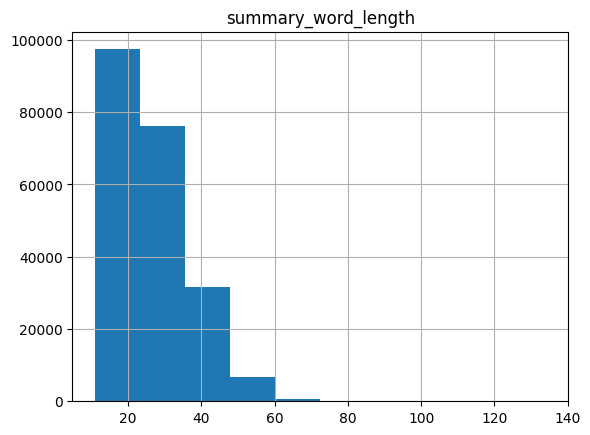

In [ ]:
raw_articles_df.loc[raw_articles_df.summary_word_length > 10].hist(column="summary_word_length")

In [ ]:
short_summaries = raw_articles_df.loc[
    (raw_articles_df.summary_word_length > 0)
    & (raw_articles_df.summary_word_length <= 10)
].sort_values(by="summary_word_length", ascending=False)

for summary in short_summaries.summary.iloc[:20]:
  print(summary)
  print("----"*10)

Fallece un paciente en SLP; 67 contagiados en 20 estados
----------------------------------------
Lozoya: si caigo, caen todos // Pandilleros tras un amparo
----------------------------------------
La ensayista lo considera un <q>gran autor y eficaz activista</q>
----------------------------------------
Ganaderos callados pero alucinados // Las mafias y sus cómplices
----------------------------------------
No se abandonará  a los trabajadores atrapados, afirma Laura Velázquez
----------------------------------------
Para entonces deberán estar concluidos los ceses de plazas duplicadas
----------------------------------------
La <q>mafia del poder</q> del rock y sus festivales desgastantes
----------------------------------------
La ministra de Seguridad acusa a los convocantes de <q>extorsión</q>
----------------------------------------
El sistema de listas acentuaría la sub  y sobrerrepresentación, aseguran
----------------------------------------
<q>Nada cambia; el caso está cerrado

array([[<Axes: title={'center': 'text_word_length'}>]], dtype=object)

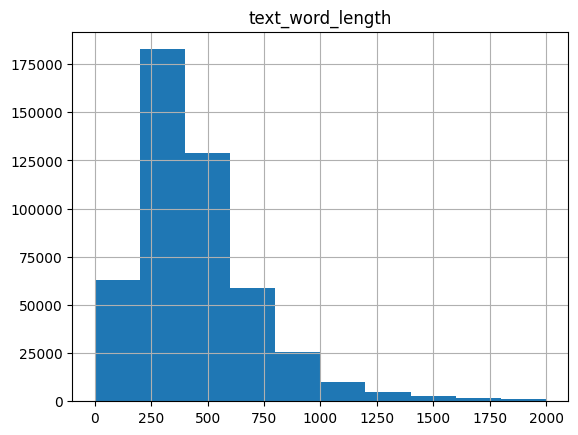

In [ ]:
raw_articles_df.loc[raw_articles_df.text_word_length < 2000].hist(column="text_word_length")

# Word clouds

In [ ]:
wordcloud = WordCloud(
    background_color="white",
    max_words=5000,
    contour_width=3,
    contour_color='steelblue',
    collocations=True
)

In [ ]:
long_string = " ".join(list(articles_df.normalized))
wordcloud.generate(long_string)
wordcloud.to_image()

# Text pre-processing

In [ ]:
from tqdm import tqdm
tqdm.pandas()

In [23]:
BATCH_SIZE = 10000

In [24]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
def remove_tags(text: str) -> str:
  return re.sub(r"<\/?.*?>", "", text)

In [26]:
def update_processed_text(text_cols: list, data_df: pd.DataFrame, db, conn):
  # create dict column
  data_df["processed_text"] = data_df.apply(
      lambda row: {col: row[col] for col in text_cols}, axis=1
  )

  # keep only the needed columns
  update_data = data_df[["_id", "processed_text"]].to_dict(orient="records")

  db.batch_update_records(
      update_data,
      "articles",
      conn,
      dict_columns=["processed_text"]
  )

In [30]:
extra_stop_words = ["ser", "haber", "tener"]
final_stop_words = nltk.corpus.stopwords.words("spanish") + extra_stop_words

In [31]:
procesor = nlp.NlpProcessor(
    texts_df = articles_df,
    spacy_model_name = "es_core_news_lg",
    process_text_config = {
        "stop_words": final_stop_words,
    },
    extra_processing_steps = [remove_tags]
)

In [ ]:
float(articles_df.normalized.isna().sum()/articles_df.shape[0])*100

37.391098425834755

In [ ]:
pending_articles = articles_df.loc[articles_df.normalized.isna()].reset_index(drop=True)
pending_articles.shape

(180000, 7)

In [33]:
total_artices = articles_df.shape[0]
total_artices

481398

In [ ]:
for start in tqdm(range(0, total_artices, BATCH_SIZE)):
  end = min(start + BATCH_SIZE, total_artices)

  batch_df = articles_df.iloc[start:end]

  batch_df.loc[:, "normalized"] = procesor.process_corpus(batch_df.text)

  update_processed_text(["normalized"], batch_df, db, conn)

  0%|          | 0/49 [00:00<?, ?it/s]/tmp/ipython-input-3387438340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df["processed_text"] = data_df.apply(
  2%|▏         | 1/49 [11:32<9:14:20, 692.93s/it]/tmp/ipython-input-3387438340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df["processed_text"] = data_df.apply(
  4%|▍         | 2/49 [22:48<8:54:58, 682.94s/it]/tmp/ipython-input-3387438340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

# LDA models

In [19]:
BASE_PATH = "/content/drive/MyDrive/tesis"
FOLDER_NAME = "news_models"

TOPICS_CONFIG = {
    "min_topics": 6,
    "max_topics": 12,
    "step_size": 3
}

In [ ]:
filtered_df = articles_df.loc[~articles_df.section.isin(remove_sections)]
filtered_df.head(3)

In [20]:
lda_model = lda.LDAModelBuilder(
    texts_df = filtered_df,
    folder_name = FOLDER_NAME,
    num_topics_config = TOPICS_CONFIG,
    base_path = BASE_PATH,
    model_passes = 150
)

6, 9, 12, 
Optimal number of topics: 12
Coherence Score for optimal number of topics: 0.41804189519227286

(0, '0.025*"ser" + 0.010*"haber" + 0.008*"persona" + 0.007*"seguridad" + 0.006*"policía" + 0.006*"autoridad" + 0.006*"dos" + 0.006*"año" + 0.005*"fiscalía" + 0.005*"ciudad"')
(1, '0.029*"ciento" + 0.028*"mil" + 0.021*"millón" + 0.015*"año" + 0.015*"ser" + 0.013*"pesos" + 0.008*"haber" + 0.007*"dólares" + 0.007*"méxico" + 0.007*"2023"')
(2, '0.028*"méxico" + 0.021*"país" + 0.015*"unidos" + 0.013*"mexicano" + 0.012*"gobierno" + 0.011*"ser" + 0.008*"migrant" + 0.008*"nacional" + 0.008*"haber" + 0.008*"internacional"')
(3, '0.020*"ser" + 0.009*"poder" + 0.008*"caso" + 0.008*"haber" + 0.008*"ley" + 0.008*"público" + 0.007*"justicia" + 0.007*"federal" + 0.006*"proceso" + 0.006*"derecho"')
(4, '0.037*"," + 0.026*"ser" + 0.022*"." + 0.012*"haber" + 0.011*"decir" + 0.010*"poder" + 0.008*"the" + 0.008*"tener" + 0.007*"biden" + 0.006*"hacer"')
(5, '0.016*"ser" + 0.010*"primero" + 0.009*"equi

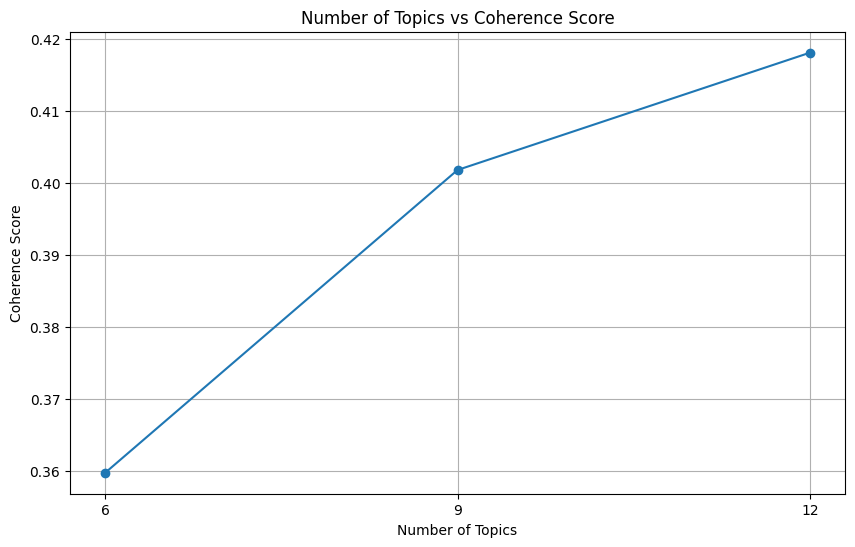

In [21]:
lda_model.build_lda_models("normalized")

In [ ]:
lda_model